# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [2]:
# Load pickled data

import random
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file =  'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = shuffle(train['features'], train['labels'])
X_valid, y_valid = shuffle(valid['features'], valid['labels'])
X_test, y_test = shuffle(test['features'], test['labels'])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print("min {} max {} mean {} stdev {}".format(X_train.min(), X_train.max(), X_train.mean(), X_train.std()))

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
min 0 max 255 mean 82.6775890369964 stdev 67.85088842633247


### Dataset Visualization

1. We randomly sample 2 images of each class from dataset from visualization.
2. We plot number of samples per class for train, validation and test dataset to get idea of label distribution.

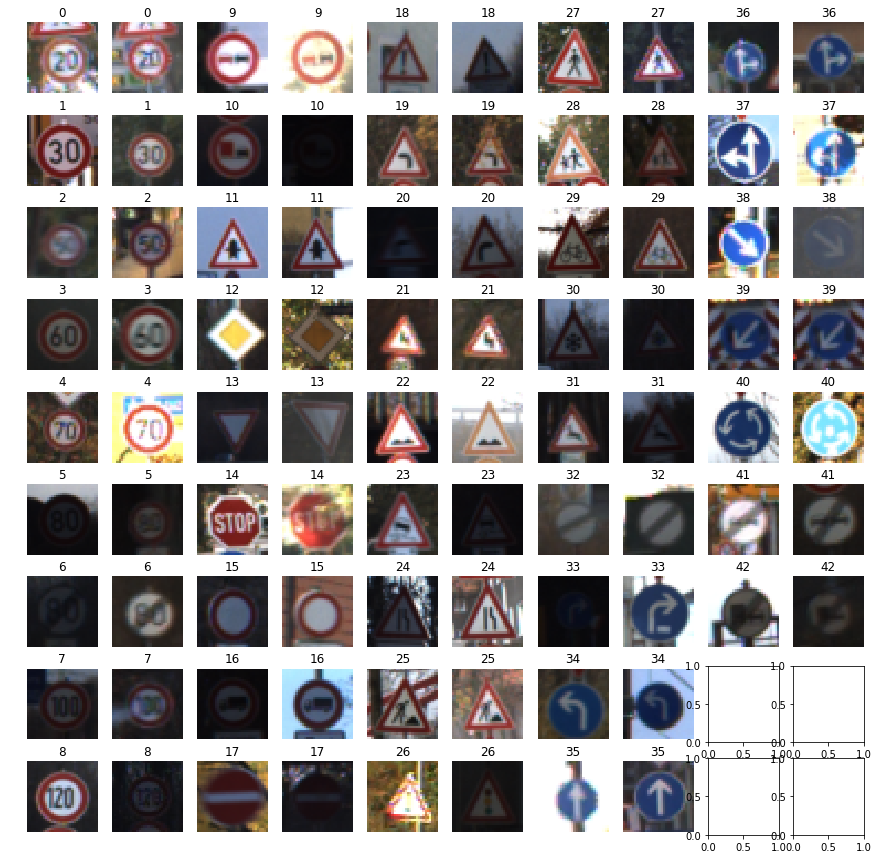

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

%matplotlib inline

fig, axs = plt.subplots(9, 10, figsize = (15 , 15))
seen_count = np.zeros((n_classes))
while seen_count.min() < 2:
    index = random.randint(0, len(X_train) - 1)
    if seen_count[y_train[index]] < 2:
        image = X_train[index].squeeze()
        i = y_train[index] % 9
        j = int(y_train[index] / 9) * 2 + int(seen_count[y_train[index]])
        axs[i, j].axis('off')
        axs[i, j].imshow(image)
        axs[i, j].set_title(y_train[index])
        seen_count[y_train[index]] += 1


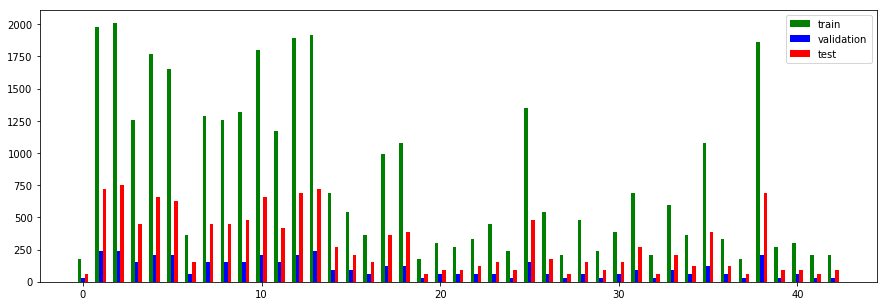

In [11]:
count_train = np.bincount(y_train)
count_valid = np.bincount(y_valid)
count_test = np.bincount(y_test)

ind = np.arange(n_classes)
fig, axs = plt.subplots(figsize = (15, 5))
axs.bar(ind - 0.2, count_train, 0.2, color = 'g', label = "train")
axs.bar(ind, count_valid, 0.2, color = 'b', label = "validation")
axs.bar(ind + 0.2, count_test, 0.2, color = 'r', label = "test")
axs.legend()
plt.show()


----

## Step 2: Design and Test a Model Architecture


### Pre-process the Data Set (normalization, grayscale, etc.)

For data preprocessing steps following steps were performed:

1. Grayscale

    We convert all images to grayscale. With Lenet-5 and colored images I got validation accuracy upto 0.86. With grayscaling there was improvement in this accuracy (it reached upto 0.89).

2. Scale-Mean Normalization

    I obtained mean and standard deviation for training data set and used those to normalize dataset. This improved validation accuracy (it reached upto 0.91).

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# grayscale

X_train = np.dot(X_train[...,:3], [0.299, 0.587, 0.114])
X_valid = np.dot(X_valid[...,:3], [0.299, 0.587, 0.114])
X_test = np.dot(X_test[...,:3], [0.299, 0.587, 0.114])

#reshape

X_train = X_train.reshape(X_train.shape + (1, ))
X_valid = X_valid.reshape(X_valid.shape + (1, ))
X_test = X_test.reshape(X_test.shape + (1, ))

mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std
X_valid = (X_valid - mean) / std

#X_train = (X_train)/255
#X_test = (X_test)/255
#X_valid = (X_valid)/255

#X_train = (X_train - 128)/ 128
#X_test = (X_test - 128)/ 128
#X_valid = (X_valid - 128)/ 128

print("min {} max {} mean {} stdev {}".format(X_train.min(), X_train.max(), X_train.mean(), X_train.std()))
print("min {} max {} mean {} stdev {}".format(X_test.min(), X_test.max(), X_test.mean(), X_test.std()))
print("min {} max {} mean {} stdev {}".format(X_valid.min(), X_valid.max(), X_valid.mean(), X_valid.std()))


min -1.1870372964920104 max 2.617166010116547 mean -1.6875874913236668e-16 stdev 1.0000000000000009
min -1.1837560772019278 max 2.617166010116547 mean -0.009672648319802715 stdev 1.0091936900154572
min -1.1701926960811706 max 2.617166010116547 mean 0.012638000635426696 stdev 1.0291017906199391


### Model Architecture


Model is composed of following stages:

1. Convolution layer with Relu activation. Input shape = 32x32x1, Output shape = 28x28x6
2. MaxPooling layer. Input shape = 28x28x6, Output shape = 14x14x6
3. Convolution layer with Relu activation. Input shape = 14x14x6, Ouput shape = 10x10x16
4. MaxPooling layer. Input shape = 10x10x16, Output shape = 5x5x16
5. Fully connected layer with Relu activation. Input shape = 400 (flatten(5x5x16)), Ouput shape = 120
6. Dropout layer
7. Fully connected layer with Relu activation. Input shape = 120, Ouput shape = 84
8. Dropout layer
9. Fully connected layer with Relu activation. Input shape = 84, Ouput shape = 10

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    weights_1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    bias_1 = tf.Variable(tf.zeros(6))
    conv_1 = tf.nn.conv2d(x, weights_1, [1, 1, 1, 1], padding = 'VALID')
    conv_1 = tf.nn.bias_add(conv_1, bias_1)

    # TODO: Activation.
    conv_1 = tf.nn.relu(conv_1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool_1 = tf.nn.max_pool(conv_1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    weights_2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    bias_2 = tf.Variable(tf.zeros(16))
    conv_2 = tf.nn.conv2d(pool_1, weights_2, [1, 1, 1, 1], padding = 'VALID')
    conv_2 = tf.nn.bias_add(conv_2, bias_2)
    
    # TODO: Activation.
    conv_2 = tf.nn.relu(conv_2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool_2 = tf.nn.max_pool(conv_2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flattened = flatten(pool_2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    weights_3 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    bias_3 = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(flattened, weights_3) + bias_3
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    weights_4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    bias_4 = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, weights_4) + bias_4
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    weights_5 = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    bias_5 = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, weights_5) + bias_5
    
    return logits

### Train, Validate and Test the Model

For minimizing loss, I used AdamOptimizer. Learning rate was set constant at 0.001; since I planned to use dropout layer, I didnt vary the learning rate, neither did I use regularization. Models weights were randomly initialized with mean = 0 and standard deviation = 0.1. I trained model for 30 epochs with batch size of 128, although, the model obtained after 9th epoch was selected for use (more on it later).


For training model, I used iterative approach. I began with running original Lenet architecture on colored images (without any normalization or preprocessing). This lead to validation accuracy of ~0.86. Greyscaling and normalization improved the accuracy to ~0.91. Thereafter I considered (a) using dropout layer (b) modifying training dataset to add images of class which is mis-classified the most (c) add regularization. With (a) my validation accuracy reached > 0.93 and hence didnt use any other approaches.

During traning I used Epochs = 30 and plotted training accuracy, validation accuracy Vs Epoch curves to see model behavior (such a curve is present below). Using this curve, I decided to use model obtained after Epoch = 9; it represents the elbow head after which training accuracy almost saturates (probable overfitting indication).



In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001

keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

saver = tf.train.Saver(max_to_keep = 30)


In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:
EPOCHS = 30
BATCH_SIZE = 128

In [17]:
validation_accuracy = []
train_accuracy = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5})
            
        validation_accuracy.append(evaluate(X_valid, y_valid))
        train_accuracy.append(evaluate(X_train, y_train))
        
        saver.save(sess, "./models/lenet_{}".format(i + 1))

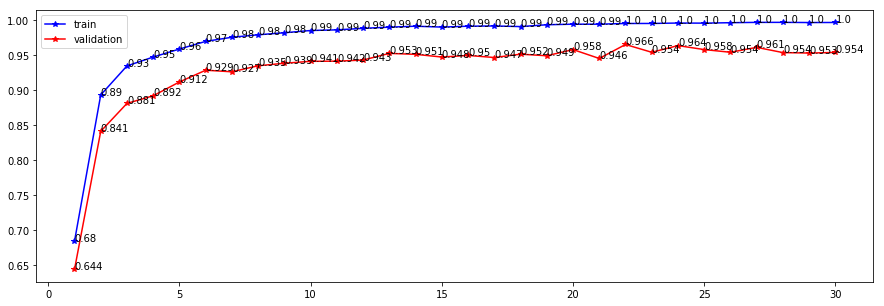

In [21]:
validation_accuracy = []
train_accuracy = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(EPOCHS):
        saver.restore(sess, "./models/lenet_{}".format(i + 1))
        validation_accuracy.append(evaluate(X_valid, y_valid))
        train_accuracy.append(evaluate(X_train, y_train))

fig, axs = plt.subplots(figsize = (15, 5))
axs.plot(np.arange(EPOCHS) + 1, train_accuracy, '-*b', label = "train")
axs.plot(np.arange(EPOCHS) + 1, validation_accuracy, '-*r', label = "validation")
axs.legend()
for i,j in zip(np.arange(EPOCHS) + 1, train_accuracy):
    axs.annotate(str(round(j, 2)), xy=(i,j))
for i,j in zip(np.arange(EPOCHS) + 1, validation_accuracy):
    axs.annotate(str(round(j, 3)), xy=(i,j))
plt.show()

In [26]:
selected_model = './models/lenet_9'

In [27]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, selected_model)
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Test Accuracy = 0.920


Training accuracy for selected model = 0.98

Validation accuracy for selected model = 0.939

Test accuracy for selected model = 0.92

Thus, validation accuracy compares favorably with the test set accuracy.

## Step 3: Test a Model on New Images

Following are the new images that I am trying out my model on:
1. 120 speed limit
2. No passing for vehicles over 3.5 metric tons
3. Stop
4. Children crossing
5. Roundabout mandatory - This sign is different from the training set in one aspect, although the roundabout arrows are similar, the sign in training set is round, whereas the sign I am using is a triangle

### Load and Output the Images

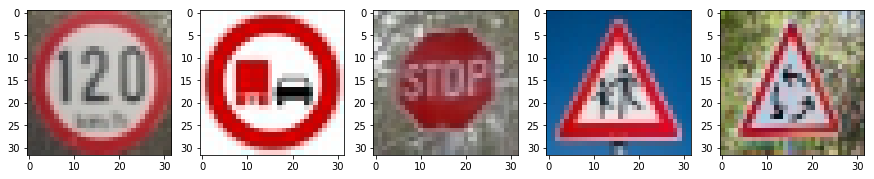

In [28]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg

img1 = mpimg.imread('./test_images/8.jpg').astype(np.float32)
img2 = mpimg.imread('./test_images/10.jpg').astype(np.float32)
img3 = mpimg.imread('./test_images/14.jpg').astype(np.float32)
img4 = mpimg.imread('./test_images/28.jpg').astype(np.float32)
img5 = mpimg.imread('./test_images/40.jpg').astype(np.float32)

X_new_images = np.array([img1[:, :, 0:3], img2[:, :, 0:3], img3[:, :, 0:3], img4[:, :, 0:3], img5[:, :, 0:3]])
y_new_images = np.array([8, 10, 14, 28, 40])

fig, axs = plt.subplots(1, 5, figsize = (15 , 5))
axs[0].imshow(mpimg.imread('./test_images/8.jpg'))
axs[1].imshow(mpimg.imread('./test_images/10.jpg'))
axs[2].imshow(mpimg.imread('./test_images/14.jpg'))
axs[3].imshow(mpimg.imread('./test_images/28.jpg'))
axs[4].imshow(mpimg.imread('./test_images/40.jpg'))


### Predict the Sign Type for Each Image

In [29]:
### Preprocessing

X_new_images = np.dot(X_new_images[...,:3], [0.299, 0.587, 0.114])
X_new_images = X_new_images.reshape(X_new_images.shape + (1, ))
X_new_images = (X_new_images - mean) / std


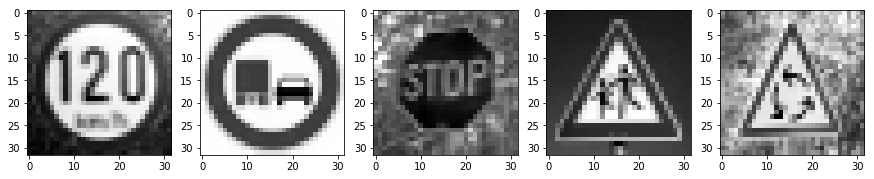

In [30]:
fig, axs = plt.subplots(1, 5, figsize = (15 , 5))

axs[0].imshow(X_new_images[0].squeeze(), cmap='gray')
axs[1].imshow(X_new_images[1].squeeze(), cmap='gray')
axs[2].imshow(X_new_images[2].squeeze(), cmap='gray')
axs[3].imshow(X_new_images[3].squeeze(), cmap='gray')
axs[4].imshow(X_new_images[4].squeeze(), cmap='gray')


In [31]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, selected_model)
    for i in range(5):
        print("Image {}, Expected Label {}, Got Label {}".format(i + 1, y_new_images[i], sess.run(tf.argmax(tf.nn.softmax(logits), 1), feed_dict = {x : X_new_images[i].reshape((1, 32, 32, 1)), keep_prob: 1})))


Image 1, Expected Label 8, Got Label [25]
Image 2, Expected Label 10, Got Label [10]
Image 3, Expected Label 14, Got Label [14]
Image 4, Expected Label 28, Got Label [28]
Image 5, Expected Label 40, Got Label [26]


### Analyze Performance

The model misclassfied for

1. 120 speed limit sign

    In images shown below we observe that there is subtle difference between 120 speed limit sign in training set and the sign that I used for testing. My test sign has words km/hr written at the bottom. This can be the reason why the model is misclassifying.

2. roundabout sign

    For this case we knew the difference in training set sign vs test sign that I used.

In [32]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, selected_model)
    print("Accuracy = {:.3f}".format(evaluate(X_new_images, y_new_images)))

Accuracy = 0.600


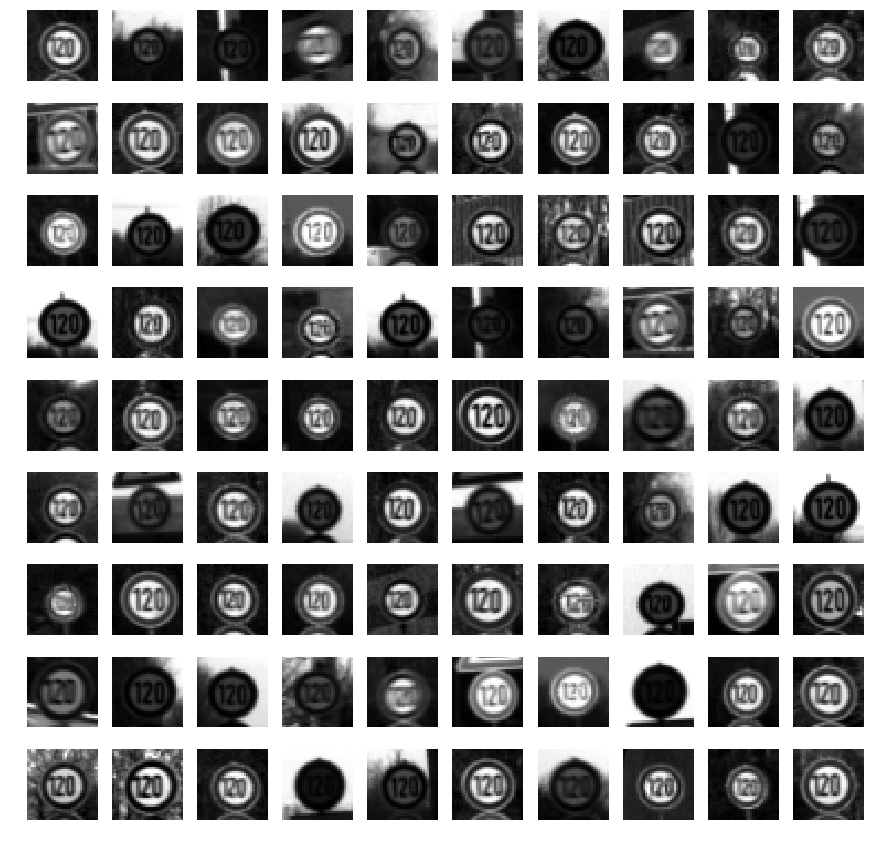

In [33]:
%matplotlib inline

fig, axs = plt.subplots(9, 10, figsize = (15 , 15))
k = 0
for i in range(9):
    for j in range(10):
        while (y_train[k] != 8):
            k += 1
        axs[i, j].axis('off')
        axs[i, j].imshow(X_train[k].squeeze(), cmap='gray')
        k += 1


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

Shown below are top-5 softmax probabilities for test images.

Misclassification of 120 speed limit sign is interesting. The top 5 softmax probabilities lead us to labels 25, 23, 20, 30 and 31. If we observe these images we see that each has some black pixels where our test image has words 'km/hr' written.

Both misclassifications by the model were because the test images had some difference with what we had in training set. We can try to alleviate this by expanding training set to include the new images.

In [34]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, selected_model)
    for i in range(5):
        print("Image {}, Expected Label = {}".format(i + 1, y_new_images[i]))
        topk = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k = 5), feed_dict = {x : X_new_images[i].reshape((1, 32, 32, 1)), keep_prob: 1})
        print("Probabilities = {}".format(np.round(topk.values[0], 2)))
        print("Labels = {}".format(topk.indices[0]))

Image 1, Expected Label = 8
Probabilities = [ 0.81999999  0.07        0.05        0.02        0.01      ]
Labels = [25 23 20 30 31]
Image 2, Expected Label = 10
Probabilities = [ 1.  0.  0.  0.  0.]
Labels = [10 42  9 37 35]
Image 3, Expected Label = 14
Probabilities = [ 0.98000002  0.01        0.          0.          0.        ]
Labels = [14 38 13 25 34]
Image 4, Expected Label = 28
Probabilities = [ 1.  0.  0.  0.  0.]
Labels = [28 29 30 20 24]
Image 5, Expected Label = 40
Probabilities = [ 0.85000002  0.05        0.02        0.01        0.01      ]
Labels = [26 18 40 24 29]


---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [36]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

#outputFeatureMap(X_new_images[i].reshape((1, 32, 32, 1)), conv_1)